In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [5]:
df_data.duplicated().values.any()

False

In [6]:
df_data.isna().values.any()

True

In [7]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [8]:
df_data[df_data.organization_name.isna()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


#### Converting Year and Birth Date to Datetime

In [9]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Adding a Column with the Prize Share as a Percentage

In [10]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data["share_perc"] = numerator / denominator
df_data.share_perc

0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Name: share_perc, Length: 962, dtype: float64

# Percentage of Male vs. Female Laureates

In [11]:
import plotly.express as px

In [12]:
fig = px.pie(
    df_data, values=df_data.sex.value_counts().values,
    names=df_data.sex.value_counts().index,
    hole=0.3,
    title="Number of Male vs Female Noble Prize Winners"
)
fig.show()

In [13]:
df_data[df_data.sex == "Female"][:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_perc
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Finding the Repeat Winners

In [14]:
multiple_winners = df_data[df_data.full_name.duplicated(keep=False)]
multiple_winners

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_perc
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


In [15]:
multiple_winners.full_name.nunique()

6

# Number of Prizes per Category

In [16]:
df_data.category.nunique()

6

In [17]:
prizes_per_category = df_data.category.value_counts()

In [18]:
fig = px.bar(
    x=prizes_per_category.index, y=prizes_per_category.values,
    color=prizes_per_category.values, color_continuous_scale=px.colors.sequential.Aggrnyl,
    title="Prizes per Category"
)

fig.update_layout(xaxis_title="Category", yaxis_title="Prizes Won")

fig.show()

In [19]:
df_data[df_data.category == "Economics"].sort_values("year")[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_perc
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

In [20]:
prizes_by_sex_category = df_data.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})
prizes_by_sex_category.sort_values("prize", ascending=False, inplace=True)
prizes_by_sex_category

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [21]:
fig = px.bar(
    x=prizes_by_sex_category.category, y=prizes_by_sex_category.prize,
    color=prizes_by_sex_category.sex,
    title="Number of Prizes Won by Men and Women, by Category"
)

fig.update_layout(xaxis_title="Category", yaxis_title="Number of Prizes")

fig.show()

# Number of Prizes Awarded Over Time

In [22]:
prizes_per_year = df_data.groupby("year").count().prize
prizes_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [23]:
moving_average = prizes_per_year.rolling(5).mean()
moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

(array([1901, 1906, 1911, 1916, 1921, 1926, 1931, 1936, 1941, 1946, 1951,
        1956, 1961, 1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006,
        2011, 2016]),
 [Text(1901, 0, '1901'),
  Text(1906, 0, '1906'),
  Text(1911, 0, '1911'),
  Text(1916, 0, '1916'),
  Text(1921, 0, '1921'),
  Text(1926, 0, '1926'),
  Text(1931, 0, '1931'),
  Text(1936, 0, '1936'),
  Text(1941, 0, '1941'),
  Text(1946, 0, '1946'),
  Text(1951, 0, '1951'),
  Text(1956, 0, '1956'),
  Text(1961, 0, '1961'),
  Text(1966, 0, '1966'),
  Text(1971, 0, '1971'),
  Text(1976, 0, '1976'),
  Text(1981, 0, '1981'),
  Text(1986, 0, '1986'),
  Text(1991, 0, '1991'),
  Text(1996, 0, '1996'),
  Text(2001, 0, '2001'),
  Text(2006, 0, '2006'),
  Text(2011, 0, '2011'),
  Text(2016, 0, '2016')])

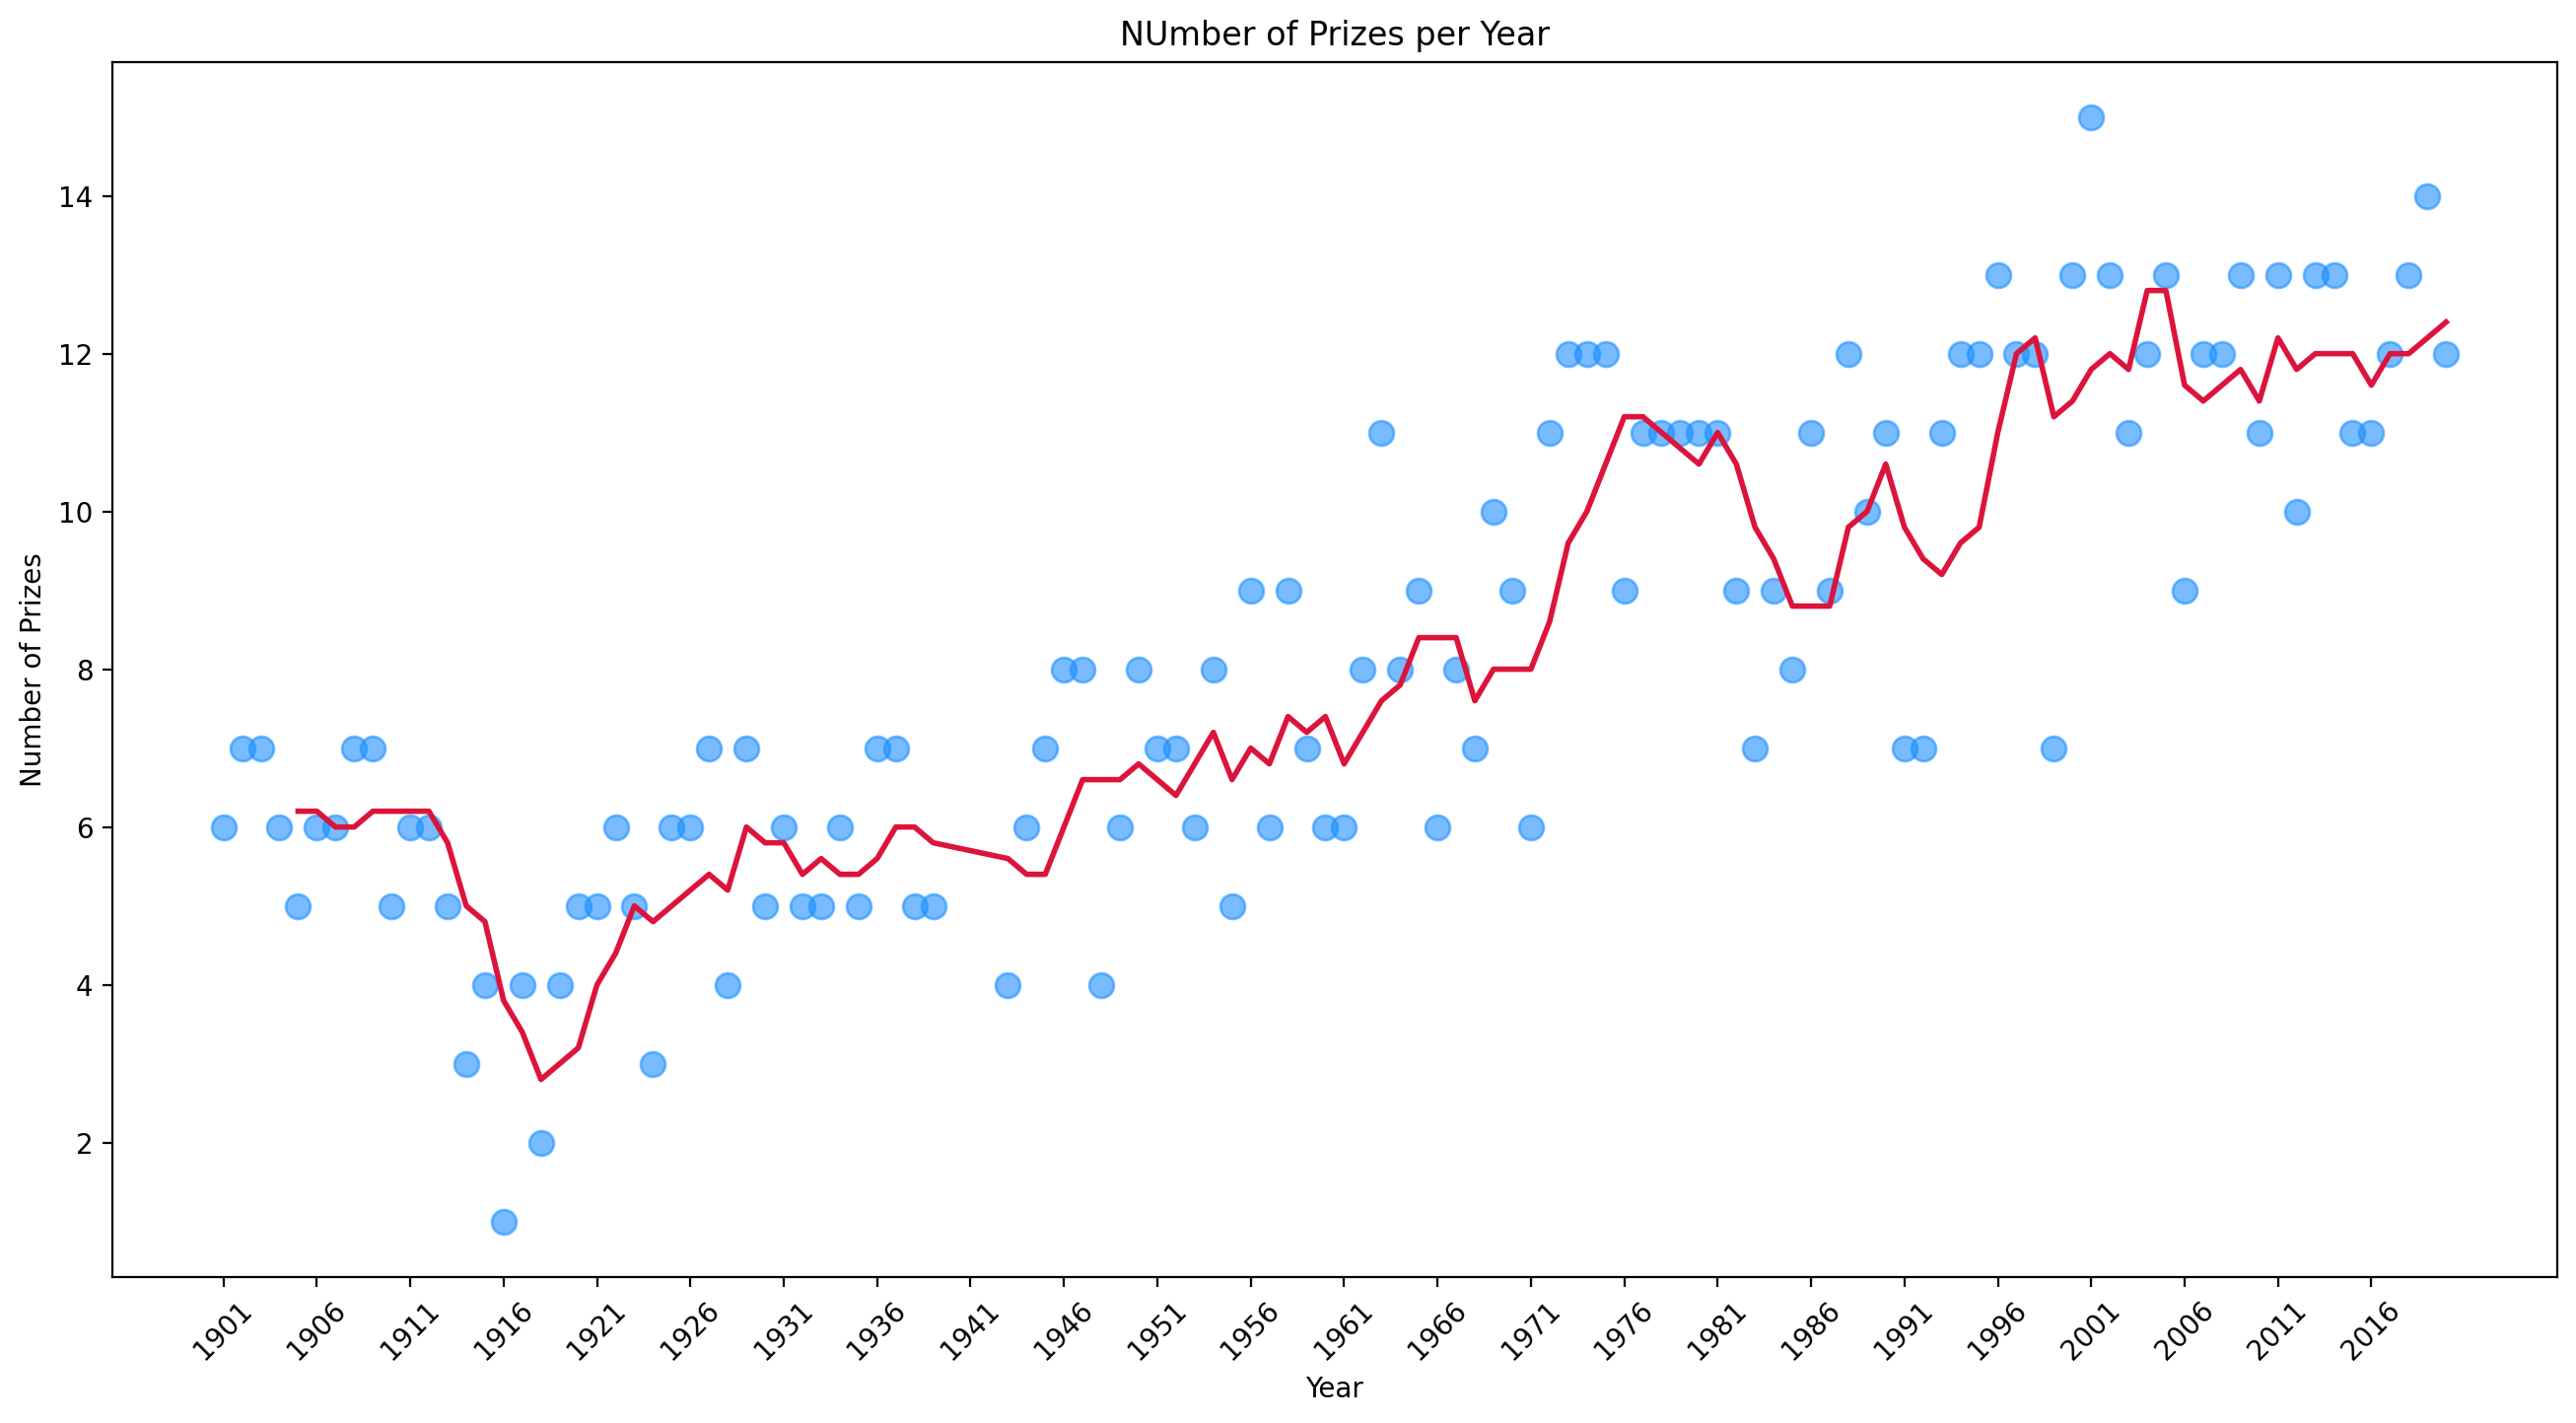

In [24]:
plt.figure(figsize=(16, 8), dpi=200)

plt.scatter(
    x=prizes_per_year.index, y=prizes_per_year.values,
    c="dodgerblue", alpha=0.6, s=80,
)

plt.plot(
    moving_average.index, moving_average.values,
    color="crimson", linewidth=2,
)

plt.title("NUmber of Prizes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Prizes")
plt.xticks(np.arange(prizes_per_year.index.min(), prizes_per_year.index.max(), 5))
plt.xticks(rotation=45)

# Seeing If Prizes Are Shared More Than Before

In [25]:
prize_share_by_year = df_data.groupby("year").share_perc.mean()
prize_share_by_year

year
1901   0.83
1902   0.71
1903   0.71
1904   0.83
1905   1.00
       ... 
2016   0.55
2017   0.50
2018   0.46
2019   0.43
2020   0.50
Name: share_perc, Length: 117, dtype: float64

In [26]:
share_moving_avg = prize_share_by_year.rolling(5).mean()
share_moving_avg

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
       ... 
2016   0.52
2017   0.50
2018   0.50
2019   0.50
2020   0.49
Name: share_perc, Length: 117, dtype: float64

Text(0.5, 1.0, 'Number of Prizes and Share Percentage per Year')

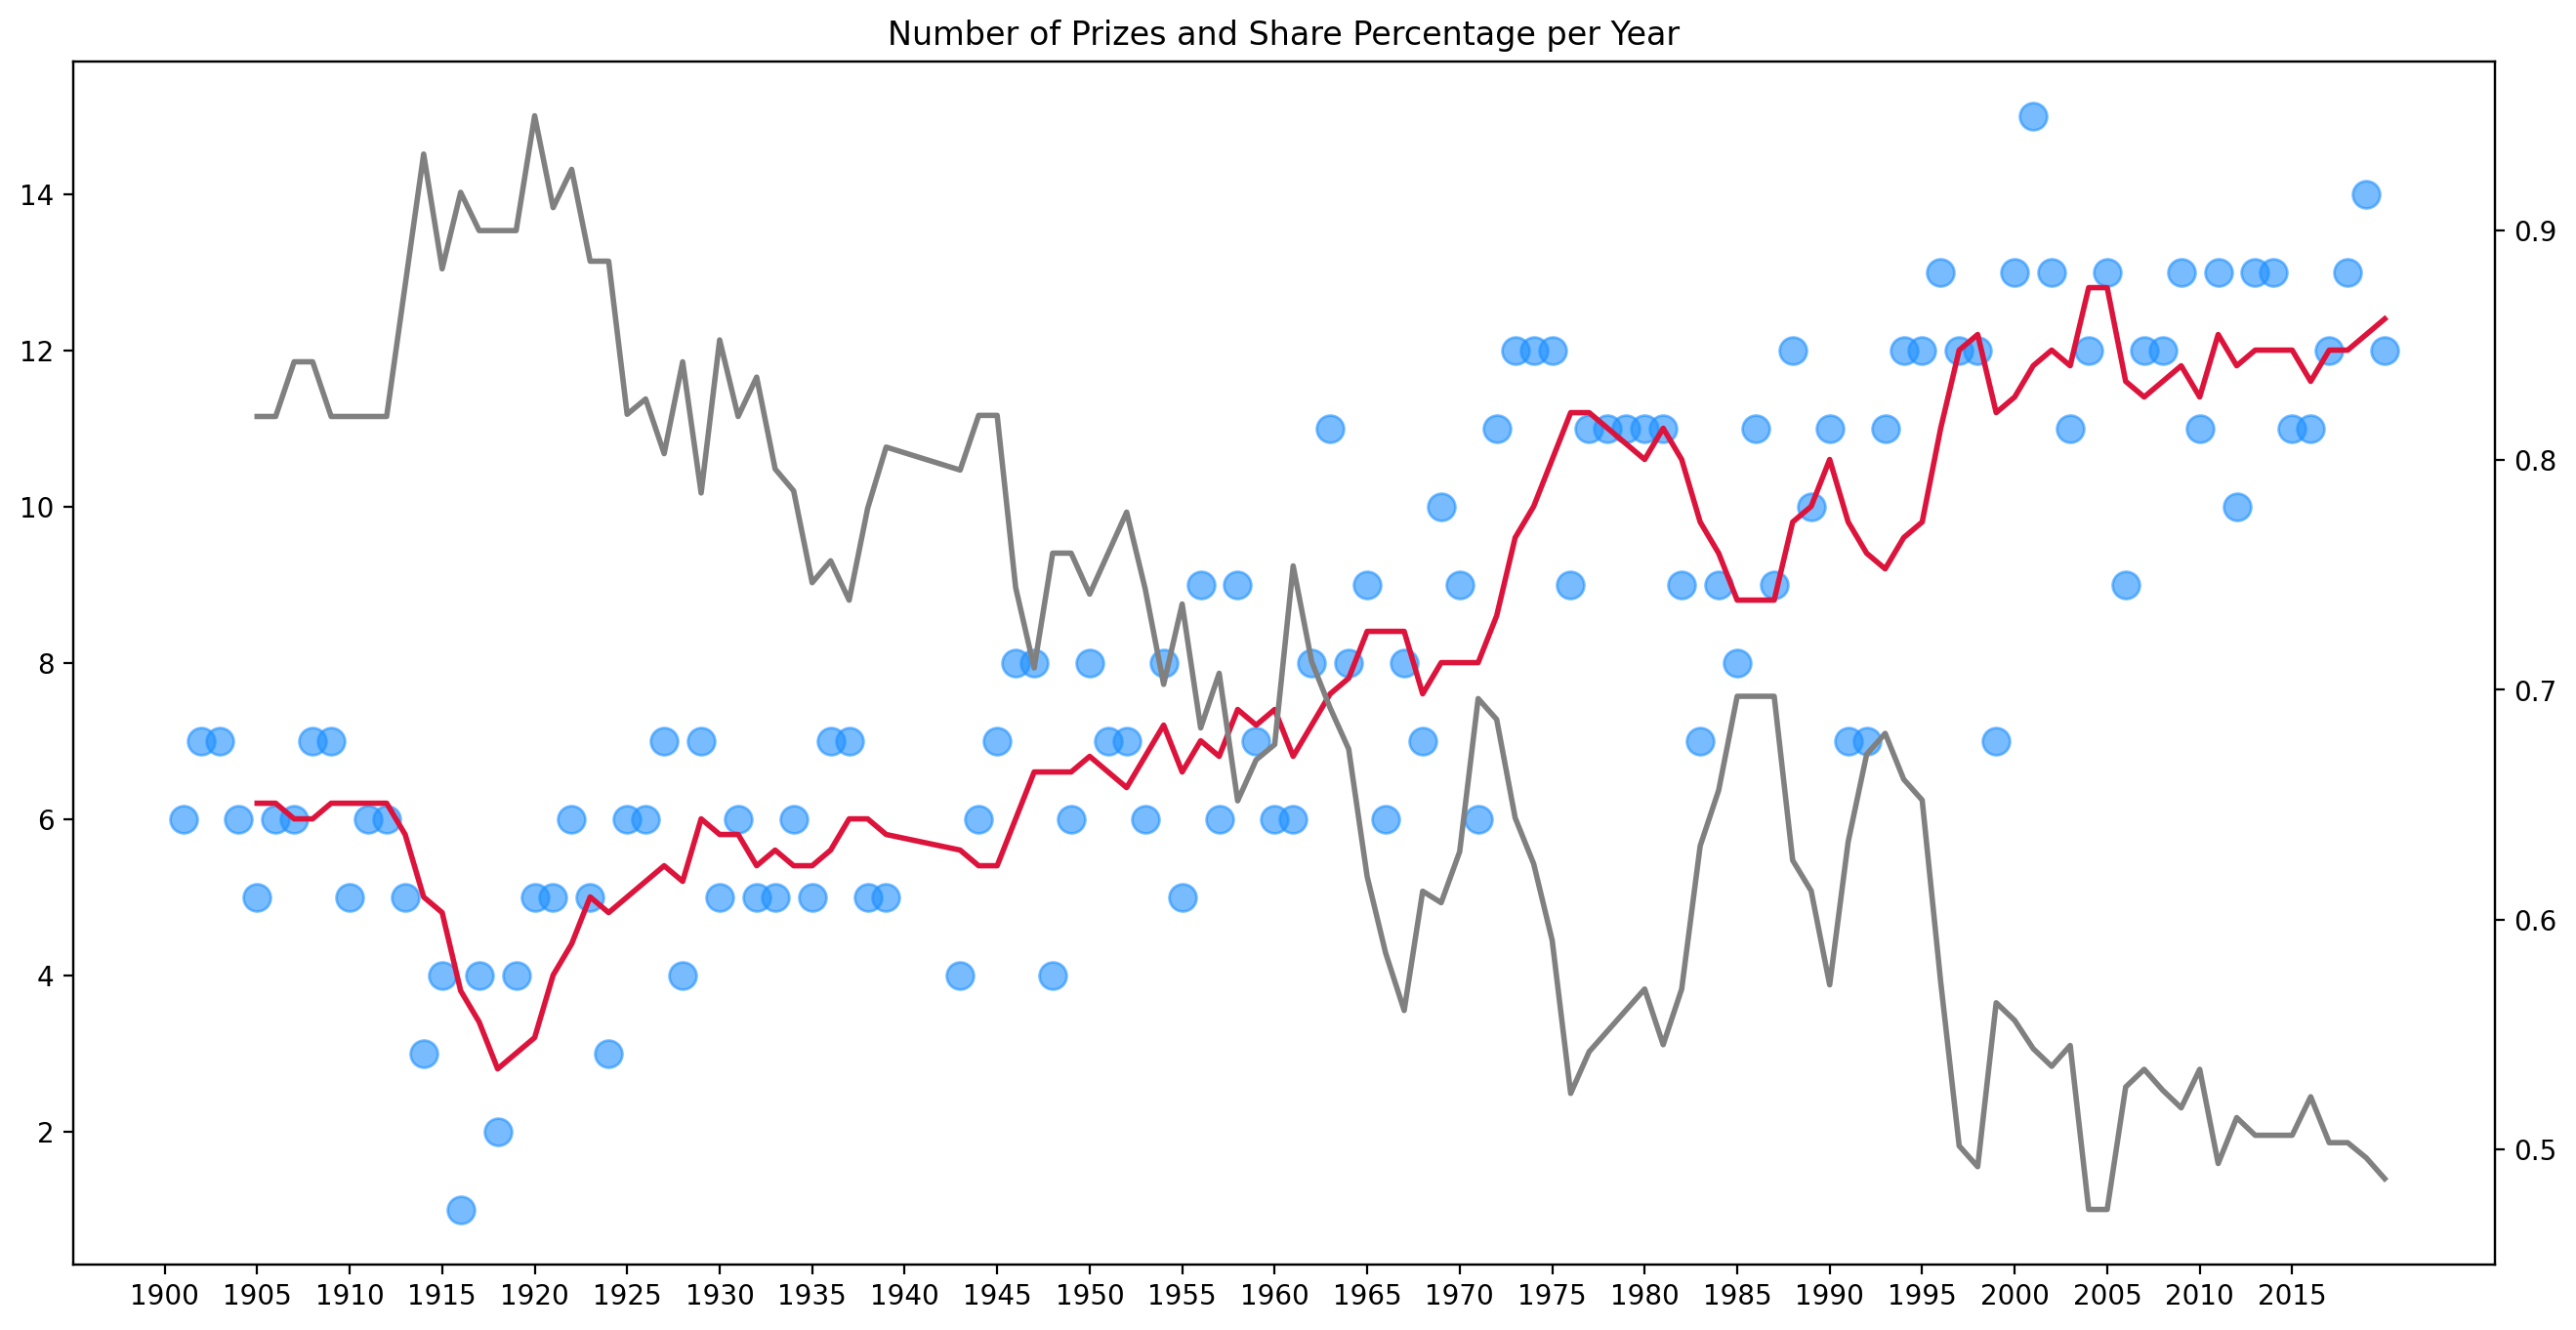

In [27]:
plt.figure(figsize=(16, 8), dpi=200)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.scatter(
    x=prizes_per_year.index, y=prizes_per_year.values,
    c="dodgerblue", alpha=0.6,s=100
)

ax1.plot(
    moving_average.index, moving_average.values,
    c="crimson", linewidth=2
)

ax2.plot(
    share_moving_avg.index, share_moving_avg.values,
    c="grey", linewidth=2
)

plt.xticks(np.arange(1900, 2020, 5), rotation=45)
plt.title("Number of Prizes and Share Percentage per Year")

#### Inverting Second Y-axis For Easier Understanding of Trend

Text(0.5, 1.0, 'Number of Prizes and Share Percentage per Year')

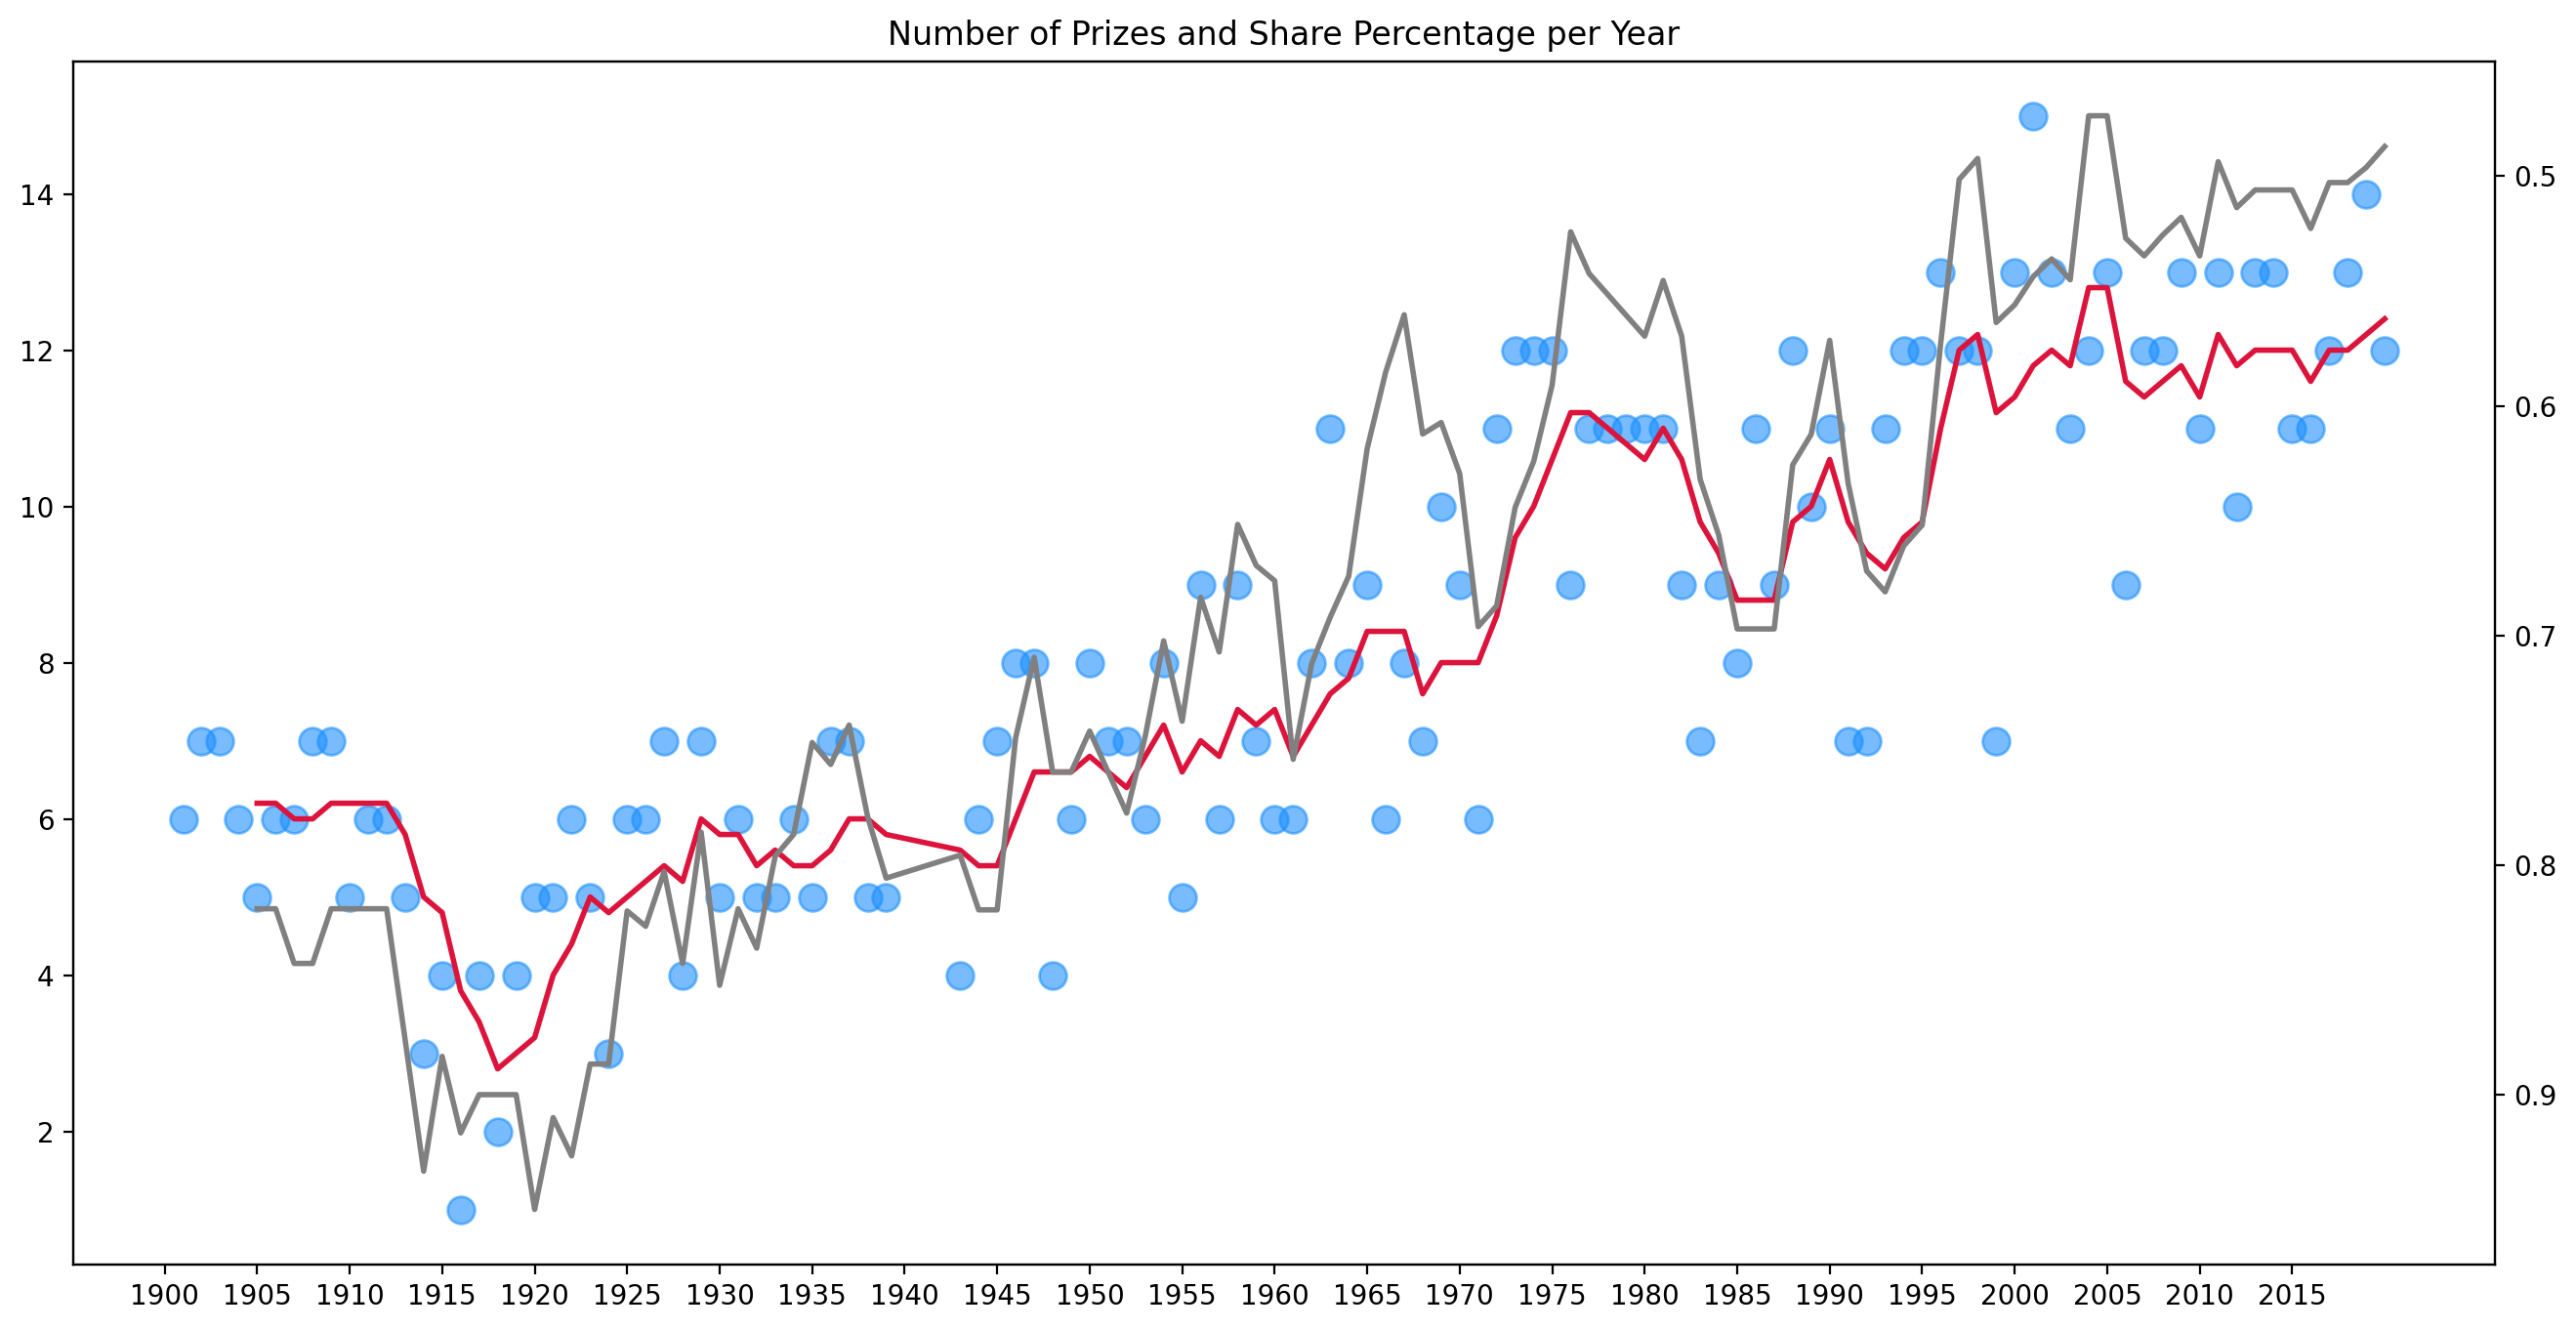

In [28]:
plt.figure(figsize=(16, 8), dpi=200)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.scatter(
    x=prizes_per_year.index, y=prizes_per_year.values,
    c="dodgerblue", alpha=0.6,s=100
)

ax1.plot(
    moving_average.index, moving_average.values,
    c="crimson", linewidth=2
)

ax2.invert_yaxis()
ax2.plot(
    share_moving_avg.index, share_moving_avg.values,
    c="grey", linewidth=2
)

plt.xticks(np.arange(1900, 2020, 5), rotation=45)
plt.title("Number of Prizes and Share Percentage per Year")

# Countries with the Most Nobel Prizes

In [29]:
top20_countries = df_data.groupby(["birth_country_current"]).agg({"prize": pd.Series.count})
top20_countries.sort_values("prize", ascending=True, inplace=True)
top20_countries = top20_countries[-20:]
top20_countries.head()

,prize
birth_country_current,
Belgium,9
Hungary,9
India,9
Australia,10
Denmark,12


In [30]:
top20_bar = px.bar(
    x=top20_countries.prize, y=top20_countries.index,
    orientation="h",
    color=top20_countries.prize,
    title="Top 20 Countries by Number of Prizes"
)
top20_bar.update_layout(
    xaxis_title="Number of Prizes", yaxis_title="Country",
    yaxis_dtick=1,
    coloraxis_showscale=False
)
top20_bar.show()

In [31]:
df_countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})

In [32]:
prizes_map = px.choropleth(
    df_countries,
    locations=df_countries.ISO, hover_name=df_countries.birth_country_current,
    color=df_countries.prize,
    color_continuous_scale=px.colors.sequential.matter
)
prizes_map.show()

# In Which Categories are the Different Countries Winning Prizes?


In [33]:
cat_country = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
cat_country.sort_values("prize", ascending=False, inplace=True)

In [34]:
merged_df = pd.merge(cat_country, top20_countries, on="birth_country_current")
merged_df

,birth_country_current,category,prize_x,prize_y
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
105,India,Literature,2,9
106,India,Medicine,2,9
107,India,Chemistry,1,9
108,India,Peace,1,9


In [35]:
merged_df.columns = ["birth_country_current", "category", "cat_prizes", "total_prizes"]

In [36]:
merged_df.sort_values("total_prizes", ascending=True, inplace=True)
merged_df

,birth_country_current,category,cat_prizes,total_prizes
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [37]:
cat_country_bar = px.bar(
    x=merged_df.cat_prizes,
    y=merged_df.birth_country_current,
    color=merged_df.category,
    orientation="h",
    title="Top 20 Countries by Number of Prizes and Category"
)

cat_country_bar.update_layout(
    xaxis_title='Number of Prizes', yaxis_title='Country',
    yaxis_dtick=1
)
cat_country_bar.show()

### Number of Prizes Won by Each Country Over Time

In [38]:
country_prizes_per_year = df_data.groupby(["birth_country_current", "year"], as_index=False).count()
country_prizes_per_year = country_prizes_per_year.sort_values("year")[["year", "birth_country_current", "prize"]]

In [39]:
cumulative_prizes = country_prizes_per_year.groupby(['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [40]:
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [41]:
country_prizes_trendline = px.line(
    cumulative_prizes, x="year", y="prize",
    color="birth_country_current",
    title="Cumulative Prizes Won By Country"
)

country_prizes_trendline.update_layout(
    xaxis_title="Year", yaxis_title="Number of Prizes"
)

country_prizes_trendline.show()

# Top Research Organisations

In [42]:
df_organisations = df_data.organization_name.value_counts()[:20]
df_organisations.sort_values(inplace=True)
df_organisations

organization_name
Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [43]:
organisations_hbar = px.bar(
    x=df_organisations.values, y=df_organisations.index,
    orientation="h",
    color=df_organisations.values, color_continuous_scale=px.colors.sequential.haline,
    title="Top 20 Research Institutes by Number of Prizes"
)

organisations_hbar.update_layout(
    xaxis_title="Number of Prizes", yaxis_title="Institute",
    yaxis_dtick=1,
    coloraxis_showscale=False
)

organisations_hbar.show()

# Which Cities Make the Most Discoveries?

In [44]:
df_org_cities = df_data.organization_city.value_counts()[:20]
df_org_cities.sort_values(inplace=True)
df_org_cities

organization_city
Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: count, dtype: int64

In [45]:
org_cities_hbar = px.bar(
    x=df_org_cities.values, y=df_org_cities.index,
    orientation="h",
    color=df_org_cities.values,
    color_continuous_scale=px.colors.sequential.haline,
    title="Top 20 Organization Cities by Number of Prizes"
)

org_cities_hbar.update_layout(
    xaxis_title="Number of Prizes", yaxis_title="Organization City",
    yaxis_dtick=1,
    coloraxis_showscale=False
)

org_cities_hbar.show()

# Where are Nobel Laureates Born?


In [46]:
df_birth_cities = df_data.birth_city.value_counts()[:20]
df_birth_cities.sort_values(inplace=True)
df_birth_cities

birth_city
Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: count, dtype: int64

In [47]:
birth_cities_hbar = px.bar(
    x=df_birth_cities.values, y=df_birth_cities.index,
    orientation="h",
    color=df_birth_cities.values,
    color_continuous_scale=px.colors.sequential.haline,
    title="Top 20 Laureate Birth Cities by Number of Prizes"
)

birth_cities_hbar.update_layout(
    xaxis_title="Number of Prizes", yaxis_title="Birth City",
    yaxis_dtick=1,
    coloraxis_showscale=False
)

birth_cities_hbar.show()


# Plotting Prizes Won as per Country, City, and Organisation



In [48]:
country_city_org = df_data.groupby(
    ["organization_country", "organization_city", "organization_name"],
    as_index=False
).agg({"prize": pd.Series.count})

country_city_org.sort_values("prize", ascending=False, inplace=True)

In [49]:
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [50]:
sunburst_chart = px.sunburst(
    country_city_org,
    path=["organization_country", "organization_city", "organization_name"],
    values="prize"
)

sunburst_chart.show()

# Patterns in the Laureate's Age at the Time of Receiving the Award



In [51]:
df_data["winning_age"] = df_data.year - df_data.birth_date.dt.year

In [52]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_perc,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00


### Who were the oldest and youngest winners?

In [53]:
oldest_laureate = df_data.nlargest(1, columns=["winning_age"])
oldest_laureate

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_perc,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [54]:
youngest_laureate = df_data.nsmallest(1, columns=["winning_age"])
youngest_laureate

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_perc,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [55]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

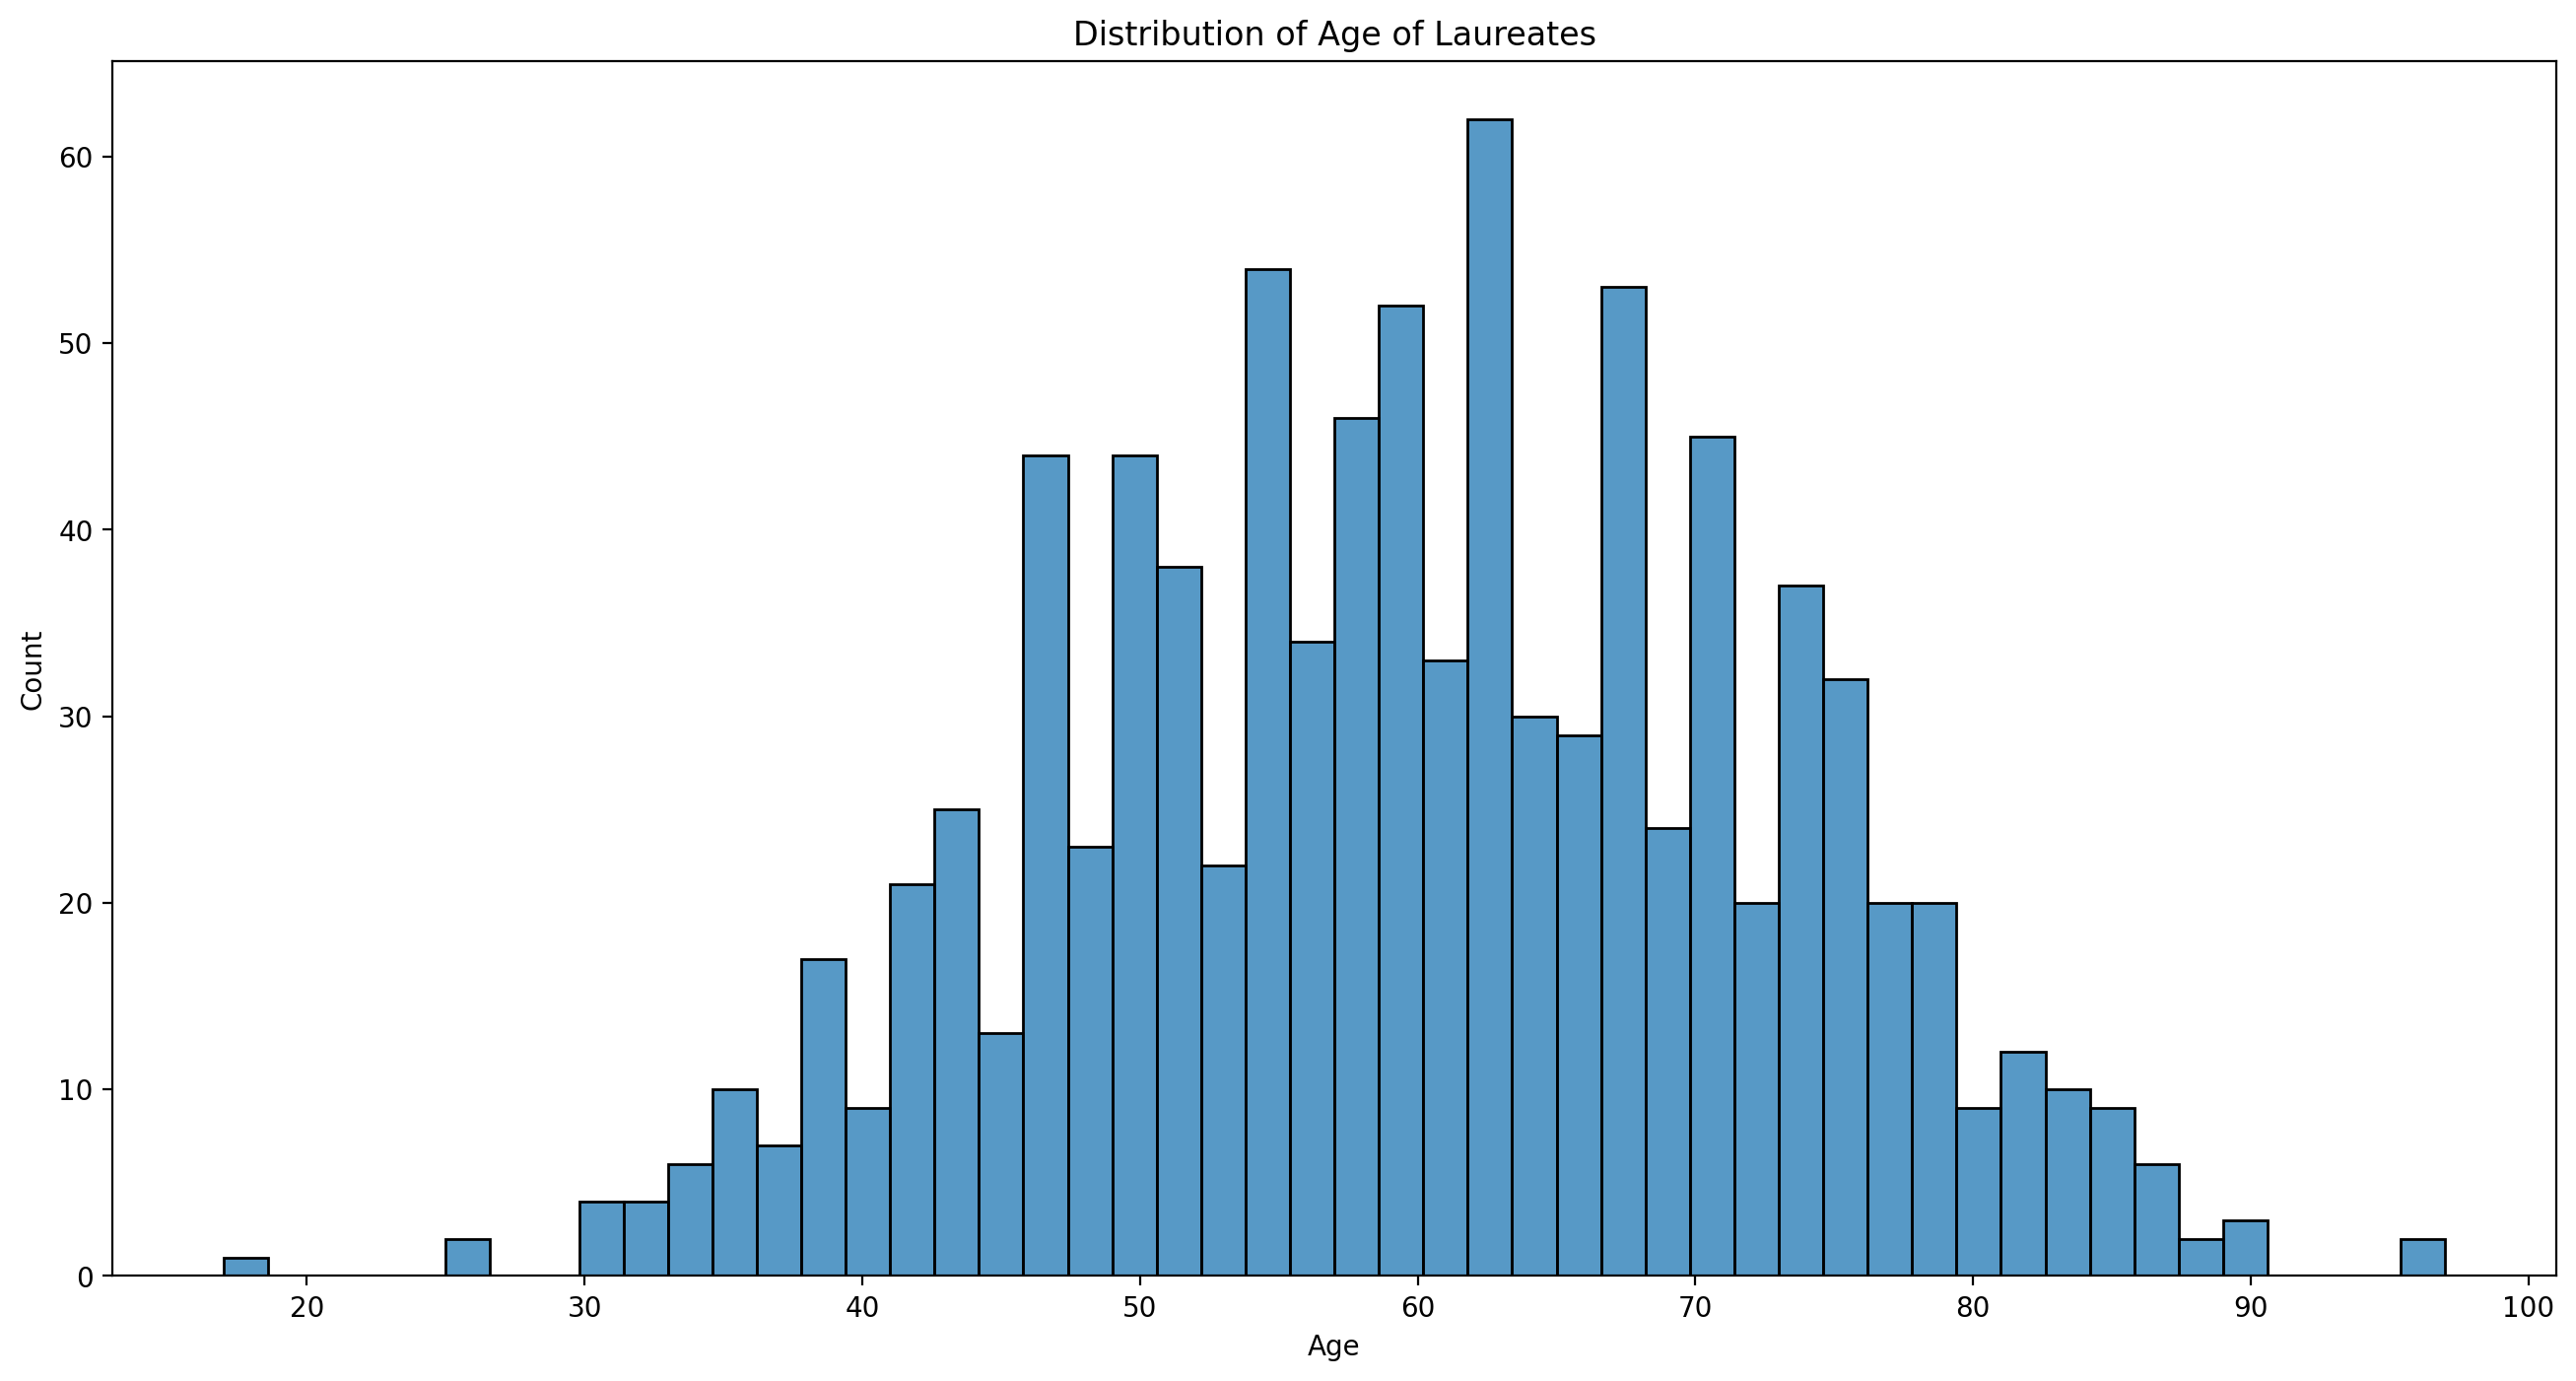

In [56]:
plt.figure(figsize=(16, 8), dpi=200)

sns.histplot(
    df_data, x="winning_age",
    bins=50,
)

plt.title("Distribution of Age of Laureates")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Age at Time of Award throughout History


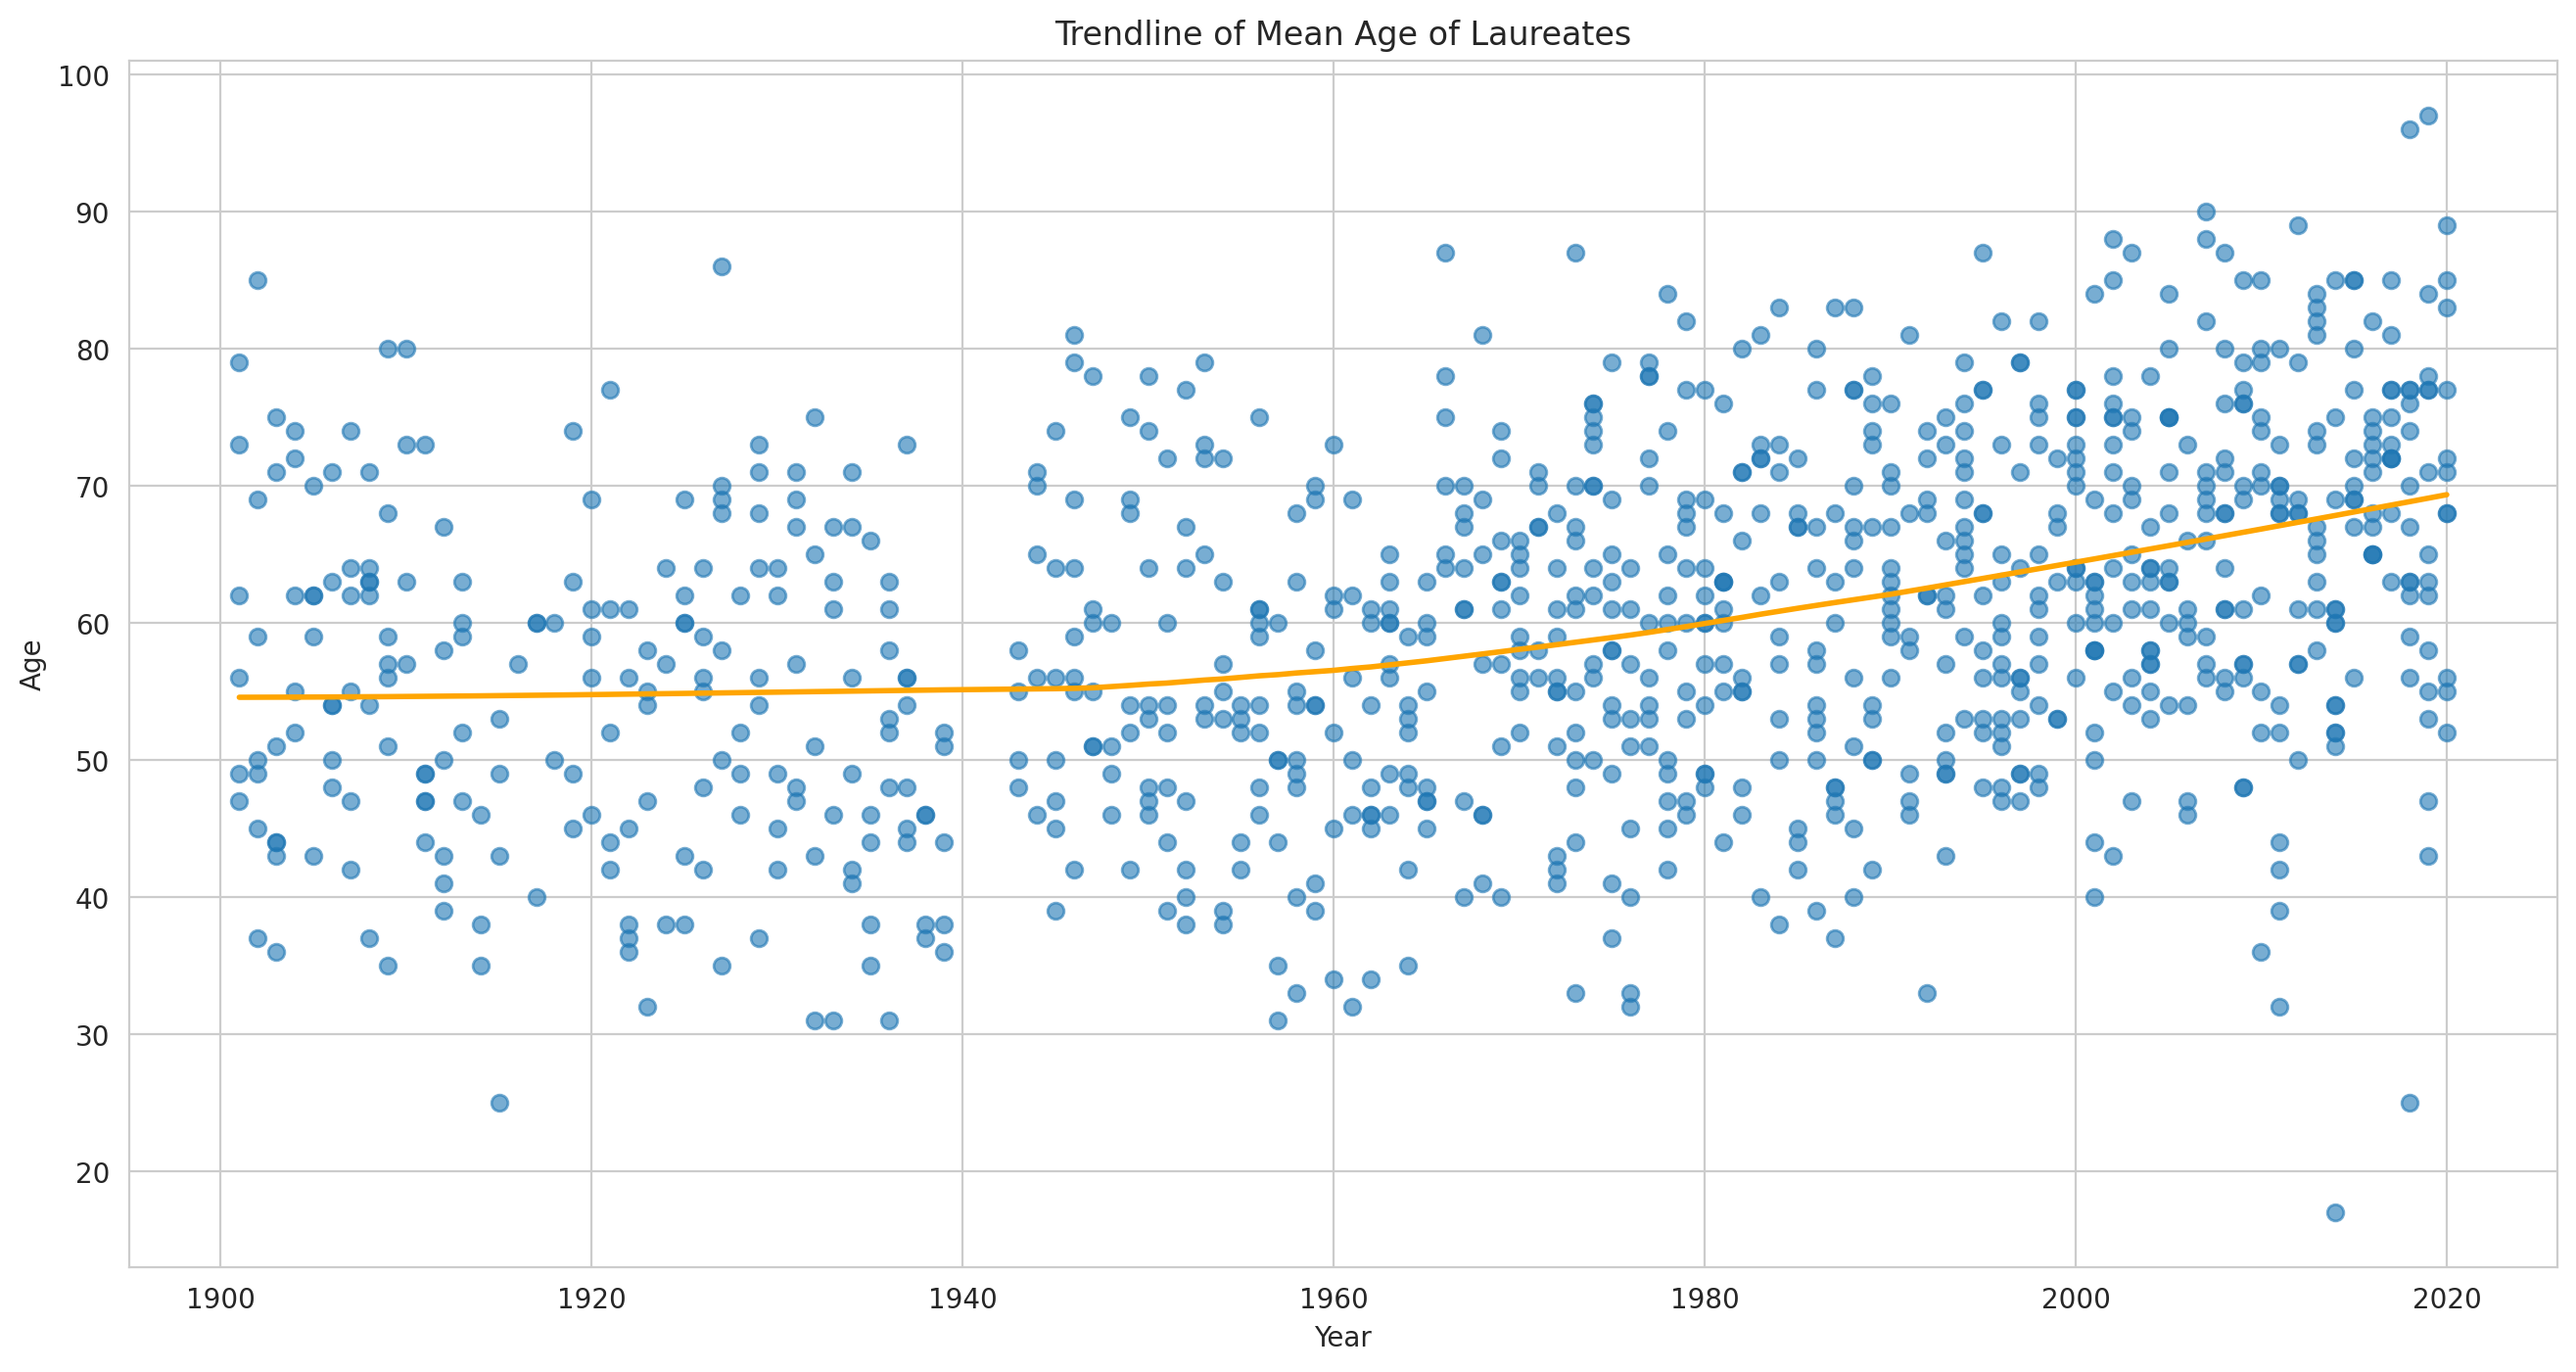

In [57]:
plt.figure(figsize=(16, 8), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(
        df_data, x="year", y="winning_age",
        line_kws={"color": "orange", "linewidth": 2},
        scatter_kws={"alpha": 0.6},
        lowess=True,
    )

plt.title("Trendline of Mean Age of Laureates")
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()

### Winning Age Across the Nobel Prize Categories

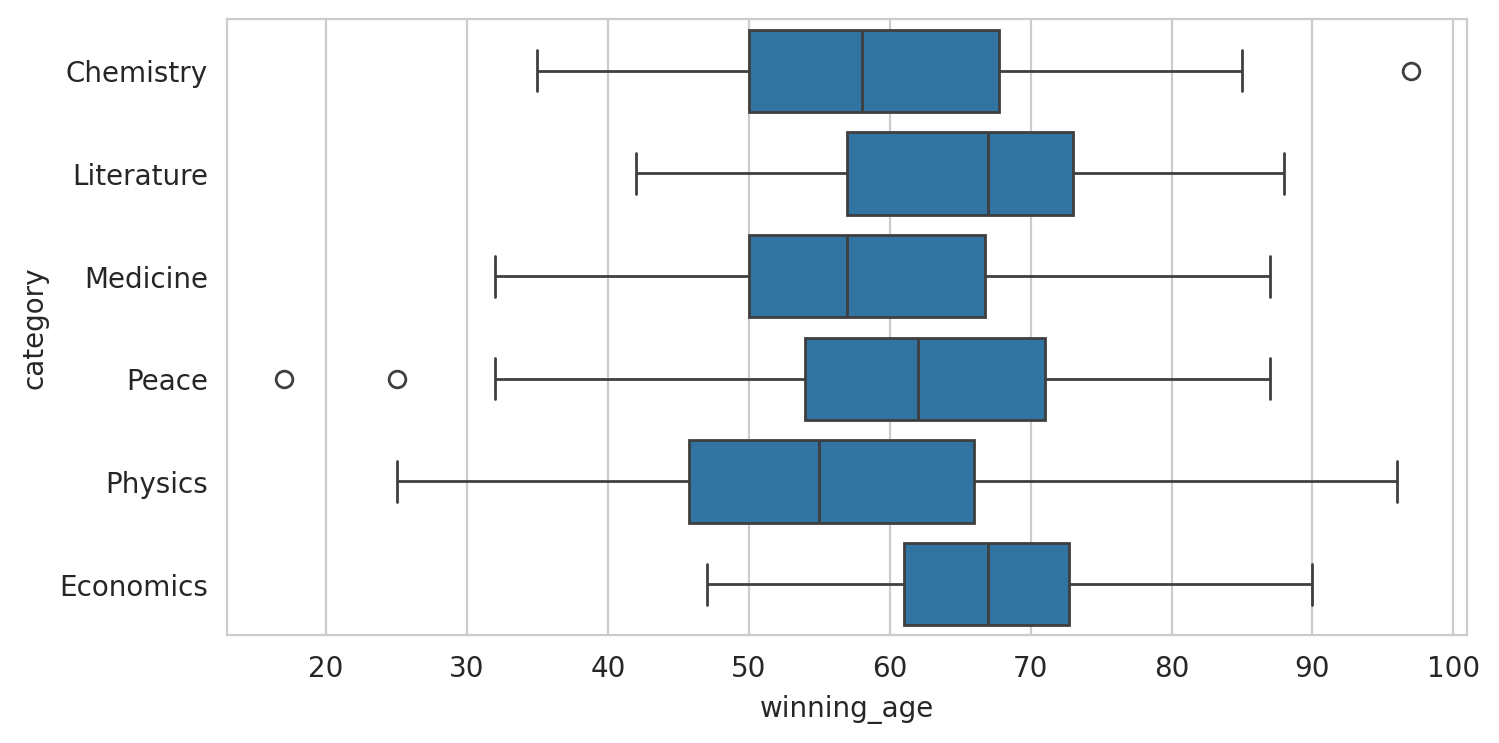

In [58]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.boxplot(
        df_data, x="winning_age", y="category"
    )

plt.show()

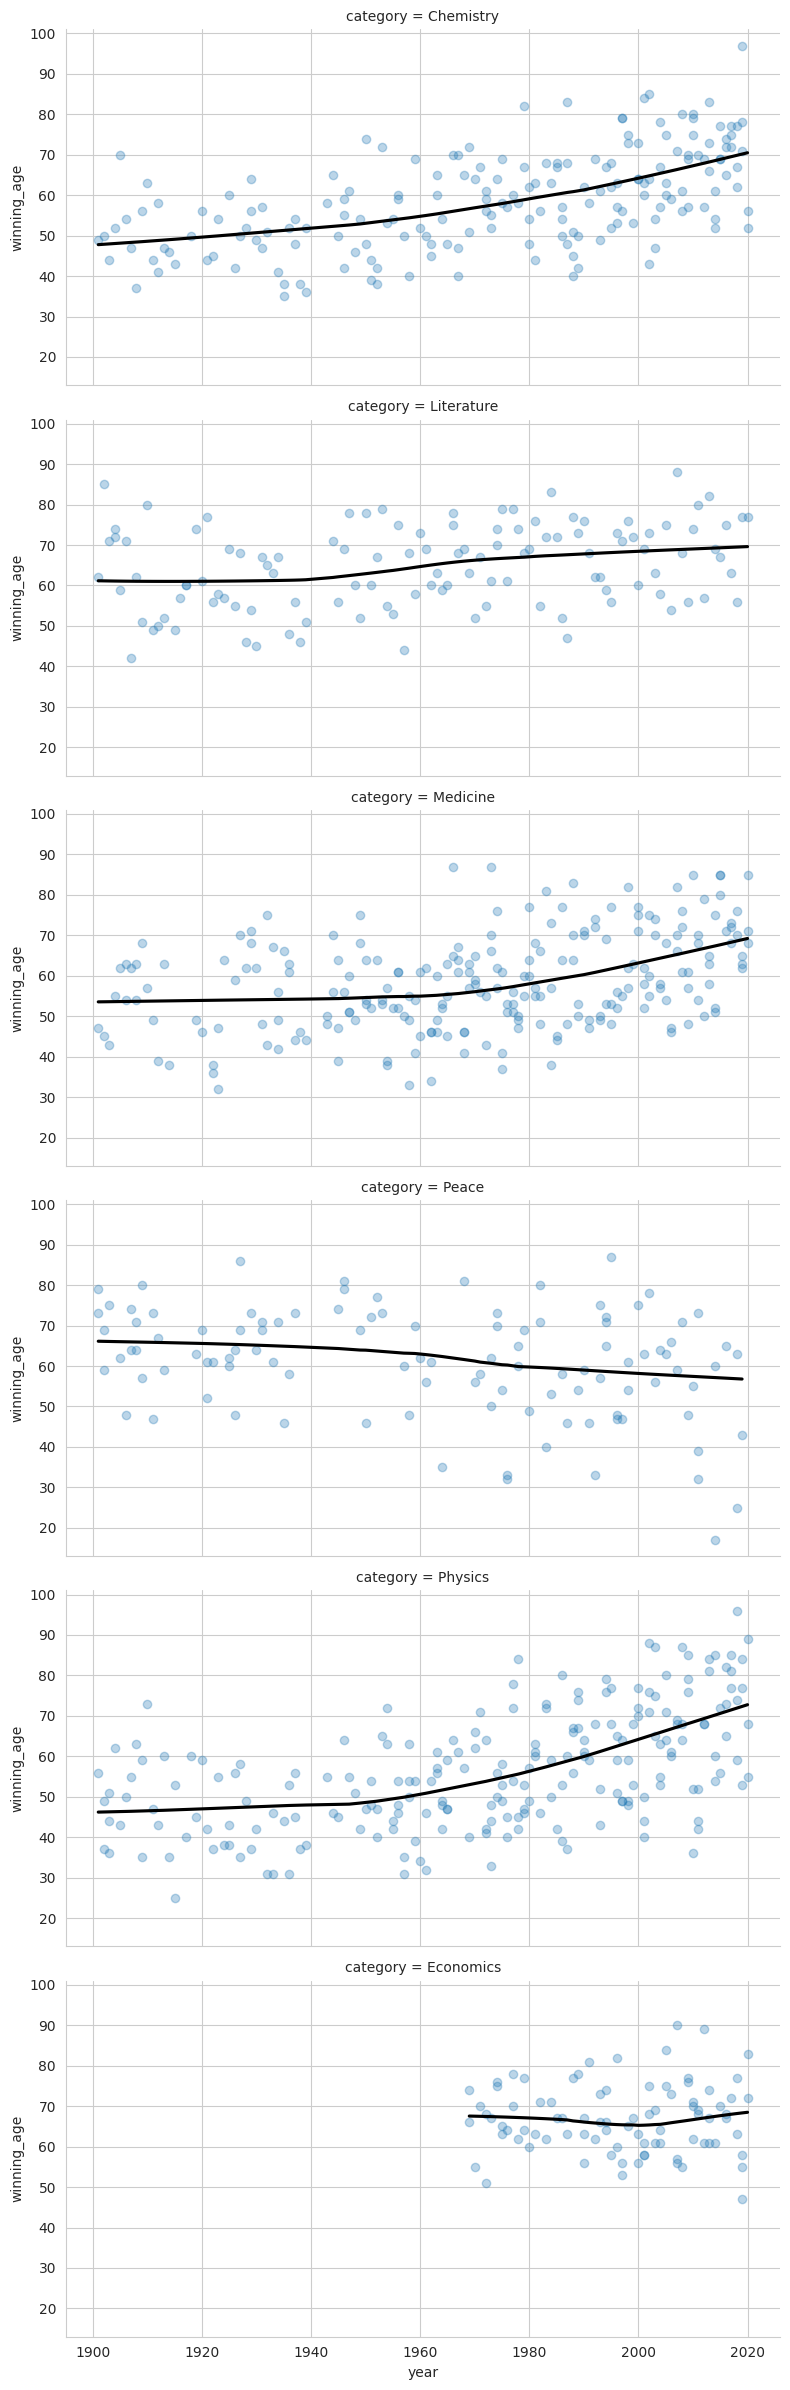

In [59]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        df_data, x="year", y="winning_age",
        row="category", lowess=True,
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "black"},
        height=4, aspect=2
    )

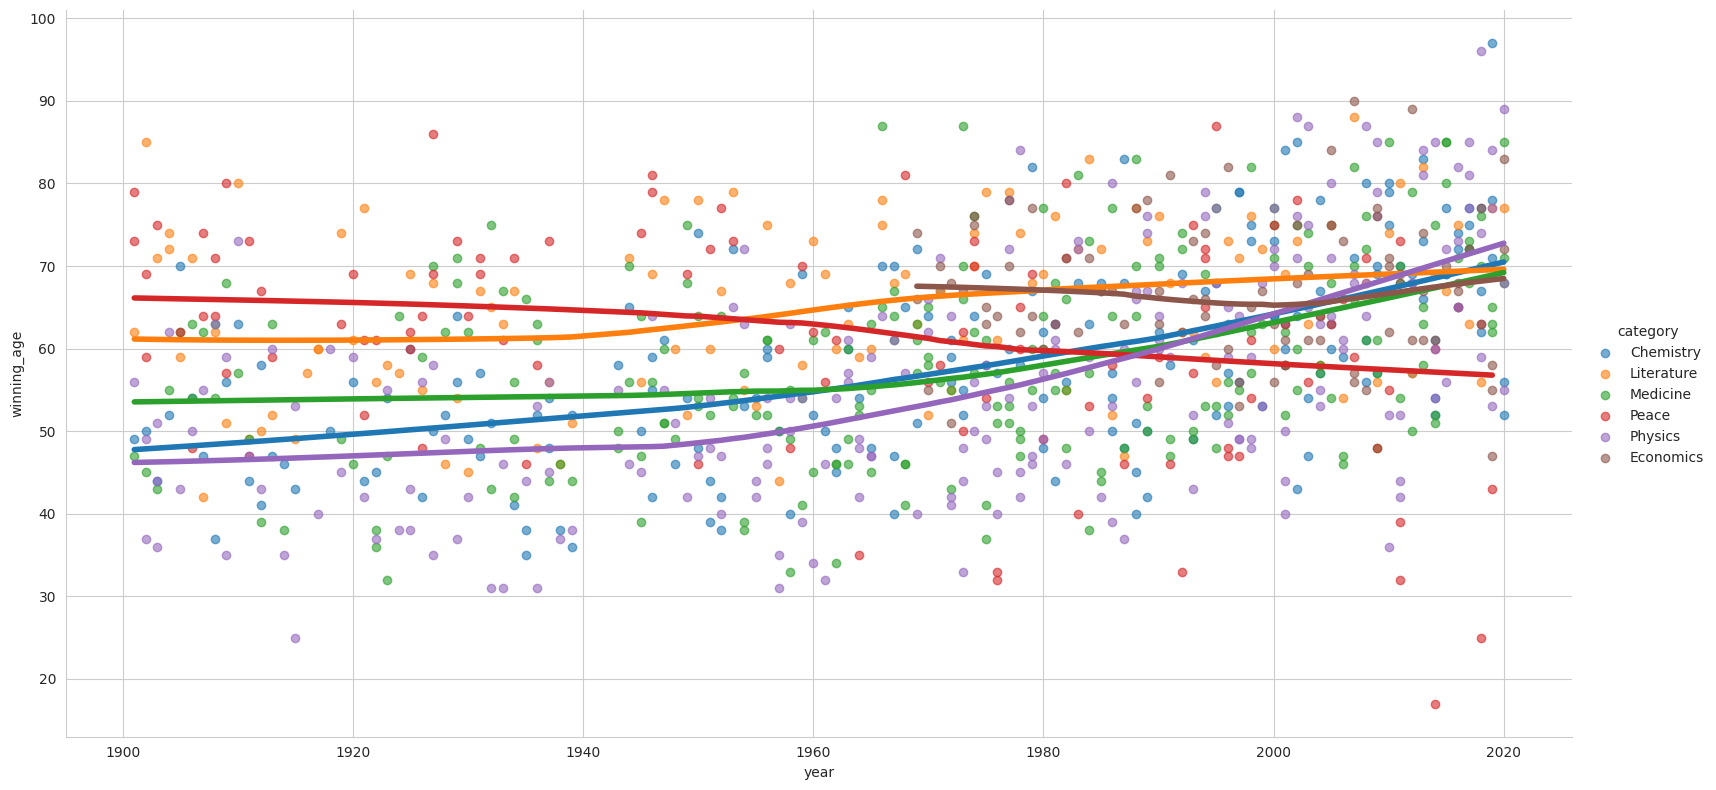

In [60]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        df_data, x="year", y="winning_age",
        hue="category", lowess=True,
        scatter_kws={"alpha": 0.6},
        line_kws={"linewidth": 4},
        height=8, aspect=2
    )